Use this cell for all your imports

In [33]:
import numpy as np
import numpy.linalg as la
from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize

You will be working with the file data.txt. Use this cell to load its content into the appropriate data structure.

In [2]:
from google.colab import files
data = files.upload()

Saving data.txt to data.txt


In [34]:
# Load data from file
#data = np.loadtxt("data.txt", comments="#", delimiter="\t", dtype=int, unpack=False, skiprows=2)
with open('data.txt', 'r') as f:
    # skip the first three lines
    for _ in range(3):
        next(f)
    
    # read the data and convert to integers
    data = []
    for line in f:
        if not line.startswith('#'):
            from_node, to_node = map(int, line.strip().split())
            data.append((from_node, to_node))

Use this cell to normalize the matrix as you see fit.

In [35]:
n_nodes = np.max(data)  # assumes that node IDs start at 1 and are consecutive integers
row, col = np.array(data).T - 1  # convert to 0-based indexing
normalized_matrix = csr_matrix((np.ones(len(data)), (row, col)), shape=(n_nodes, n_nodes))

Apply the PageRank algorithm to the matrix you created.

In [36]:
def pageRank(data, max_iter, damping_factor, tol):

  # Initialize PageRank scores
  number_nodes = data.shape[0]
  X = np.ones(number_nodes) / number_nodes

  # Run PageRank algorithm
  for i in range(max_iter):
      X_ = X.copy()
      #X = data.dot(X) * damping_factor + (1 - damping_factor)/ number_nodes
      X= damping_factor * (data @ X) + (1 - damping_factor) / number_nodes
      delta = np.abs(X- X_).sum()
      if delta < tol:
          print(f"Converged after {i+1} iterations")
          break
      return X

pagerank = pageRank(normalized_matrix,max_iter = 100, damping_factor=0.85, tol=1e-6)

Output a list of the 100 most important papers along with their importance

In [37]:
# Sort nodes by PageRank score in descending order
pagerank_scores = {i: score for i, score in enumerate(pagerank)}
sorted_scores = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Print top 10 nodes by PageRank score
print("Top 100 nodes by PageRank score:")
for node, score in sorted_scores[:100]:
    print(f" {node}: {score:.5f}")

Top 100 nodes by PageRank score:
 9905110: 0.00005
 9710045: 0.00003
 110054: 0.00003
 210156: 0.00002
 101125: 0.00002
 7169: 0.00002
 204088: 0.00002
 201252: 0.00002
 9809038: 0.00002
 9802066: 0.00002
 109161: 0.00002
 207115: 0.00002
 9802050: 0.00002
 9712252: 0.00002
 111207: 0.00002
 209229: 0.00002
 11196: 0.00002
 210291: 0.00002
 209240: 0.00002
 106047: 0.00002
 211177: 0.00001
 210223: 0.00001
 9807170: 0.00001
 9611189: 0.00001
 204252: 0.00001
 9806198: 0.00001
 9201: 0.00001
 9906141: 0.00001
 211244: 0.00001
 207129: 0.00001
 9906017: 0.00001
 9909060: 0.00001
 108171: 0.00001
 206062: 0.00001
 7194: 0.00001
 203047: 0.00001
 303190: 0.00001
 303255: 0.00001
 206037: 0.00001
 3189: 0.00001
 9908003: 0.00001
 9912163: 0.00001
 9705130: 0.00001
 9801181: 0.00001
 3085: 0.00001
 208141: 0.00001
 9803071: 0.00001
 104030: 0.00001
 302124: 0.00001
 106200: 0.00001
 203156: 0.00001
 303071: 0.00001
 9710230: 0.00001
 110273: 0.00001
 303184: 0.00001
 107080: 0.00001
 9812060

Visualize your results

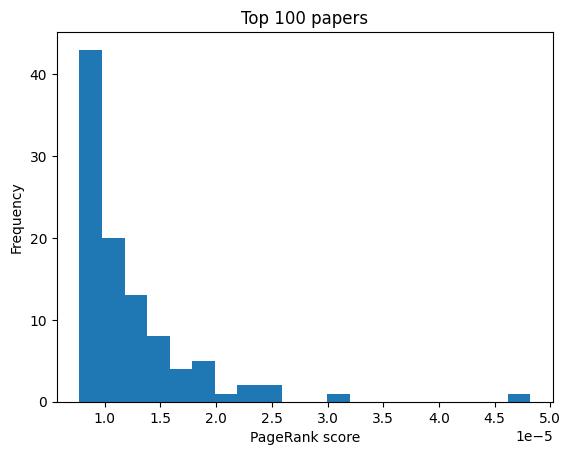

In [42]:
import matplotlib.pyplot as plt
# Create a list of the top 100 paper scores
scores = [score for _, score in sorted_scores[:100]]

plt.hist(scores, bins=20)
plt.xlabel('PageRank score')
plt.ylabel('Frequency')
plt.title('Top 100 papers')
plt.show()